In [1]:
%%HTML

<div class='tableauPlaceholder' id='viz1512062244547' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;IP&#47;IPLDashboard_0&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='IPLDashboard_0&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;IP&#47;IPLDashboard_0&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1512062244547');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1520px';vizElement.style.height='1787px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
#deliveries.csv

In [10]:
matches=pd.read_csv('matches.csv')   
delivery=pd.read_csv('deliveries.csv')
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [13]:
print(matches.columns)
print('*'*70)
print(matches.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
**********************************************************************
Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [14]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [18]:
matches['umpire3'].unique()

array([nan])

In [21]:
print(matches.isnull().sum())
print("*"*70)
print(delivery.isnull().sum())

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64
**********************************************************************
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed

In [22]:
matches.drop(['umpire3'], axis=1, inplace=True)

In [24]:
matches.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


In [25]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [26]:
delivery.fillna(0, inplace=True)

In [27]:
delivery.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [28]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [29]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [31]:
matches['team1'].unique()

array(['SRH', 'MI', 'GL', 'RPS', 'RCB', 'KKR', 'DD', 'KXIP', 'CSK', 'RR',
       'DC', 'KTK', 'PW'], dtype=object)

In [32]:
delivery['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [33]:
delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [34]:
delivery['batting_team'].unique()

array(['SRH', 'RCB', 'MI', 'RPS', 'GL', 'KKR', 'KXIP', 'DD', 'CSK', 'RR',
       'DC', 'KTK', 'PW'], dtype=object)

In [37]:
print('Total Matches Played:',matches.shape[0])
print("*"*70)
print(' \n Venues Played At:',matches['city'].unique())     
print("*"*70)
print(' \n Teams :',matches['team1'].unique())
print("*"*70)
print('Total Matches Played:',delivery.shape[0])

Total Matches Played: 636
**********************************************************************
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]
**********************************************************************
 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']
**********************************************************************
Total Matches Played: 150460


In [38]:
print('Total venues played at:',matches['city'].nunique())
print('\nTotal umpires ',matches['umpire1'].nunique())

Total venues played at: 30

Total umpires  44


In [40]:
matches['umpire1'].nunique()

44

In [41]:
matches['team1'].nunique()

13

In [43]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [46]:
delivery["batsman"].nunique()

461

In [47]:
print((matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
MI : has the highest number of match wins


In [50]:
df=matches.iloc[[matches["win_by_runs"].idxmax()]]

In [51]:
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


In [52]:
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


In [53]:
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 field    62.911612
bat      47.313692
Name: toss_decision, dtype: float64


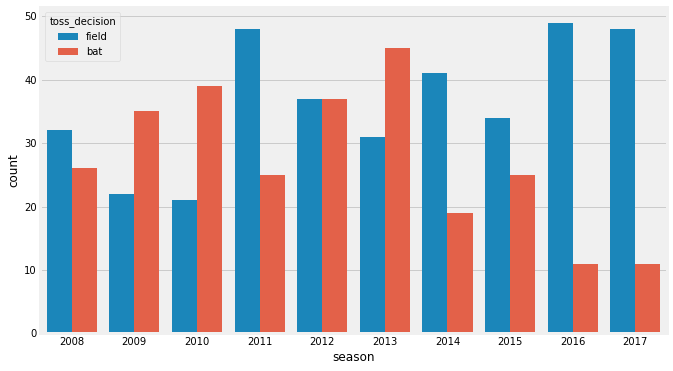

In [54]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.show()

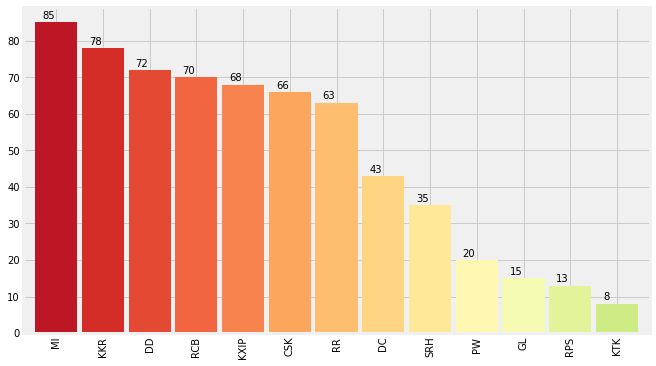

In [55]:
mlt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.show()

In [56]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

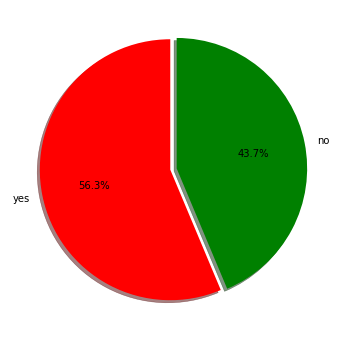

In [57]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

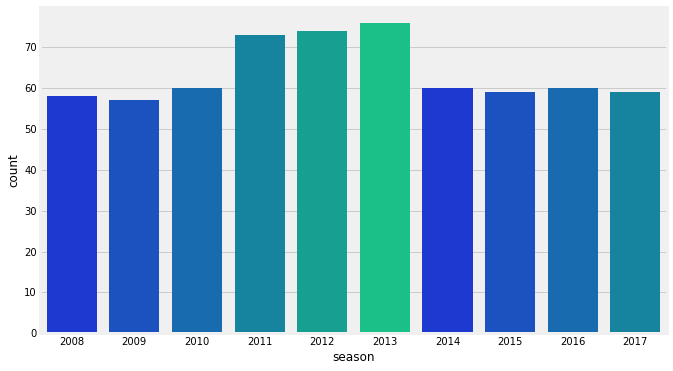

In [58]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
mlt.show()

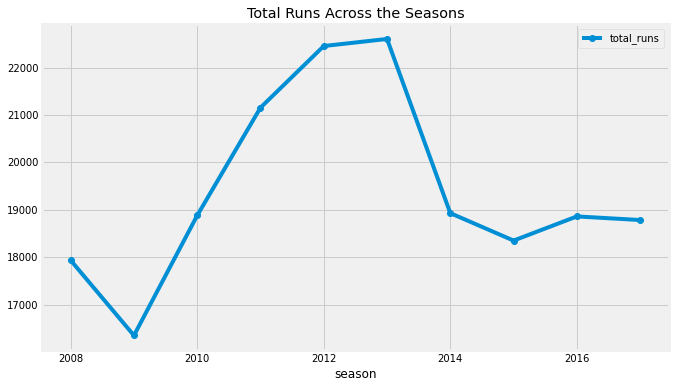

In [59]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
mlt.show()

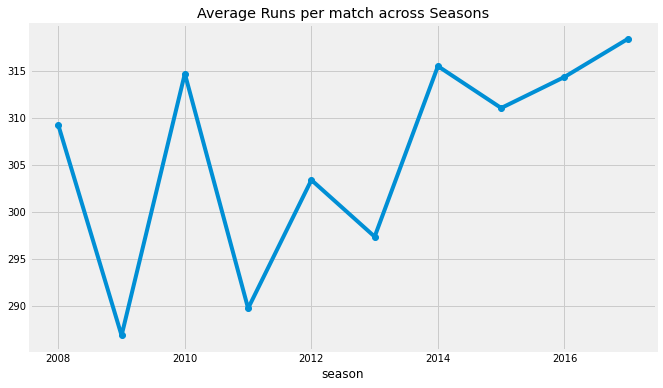

In [60]:
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Average Runs per match across Seasons')
mlt.show()

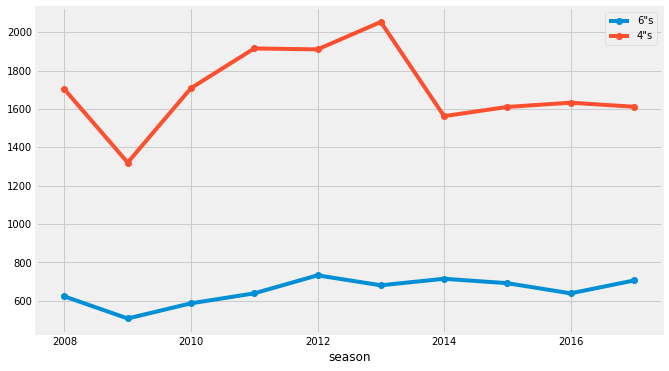

In [61]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

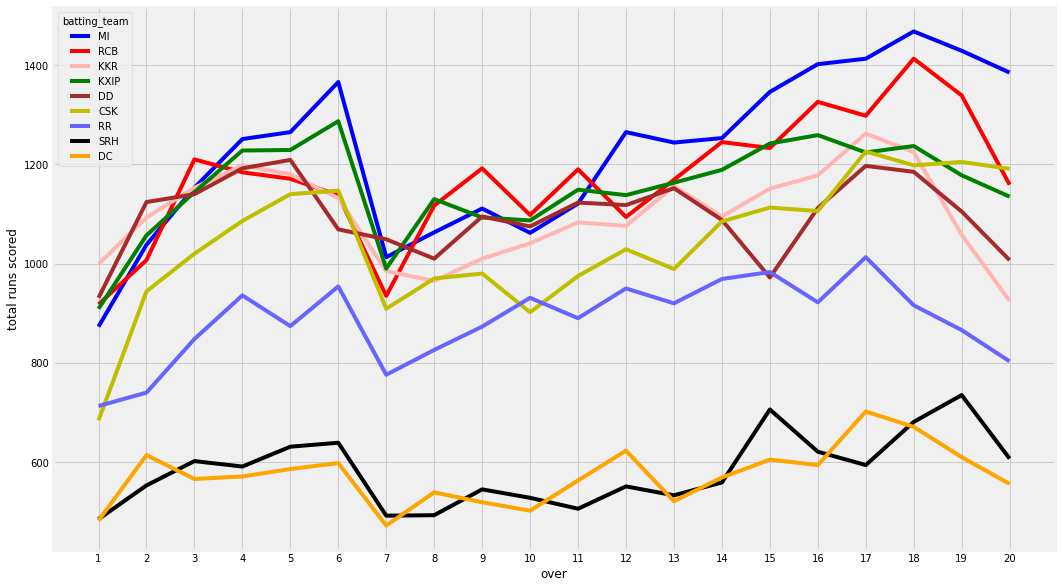

In [62]:
runs_per_over = delivery.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mlt.xticks(x)
mlt.ylabel('total runs scored')
fig=mlt.gcf()
fig.set_size_inches(16,10)
mlt.show()

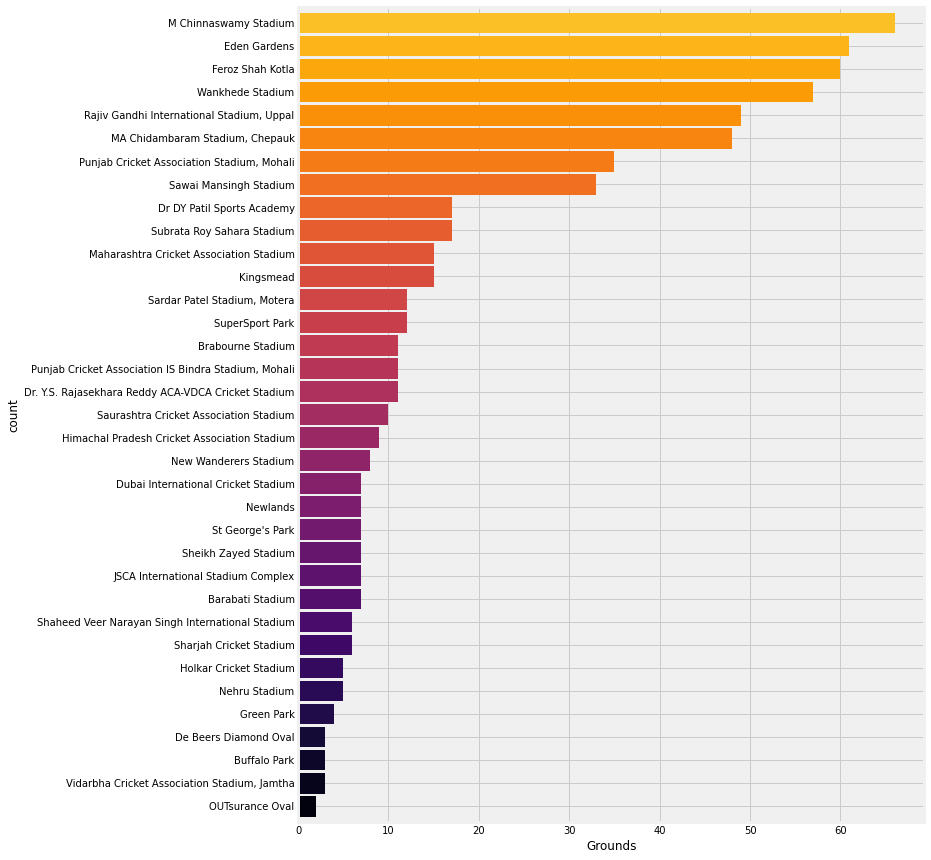

In [63]:
mlt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.show()

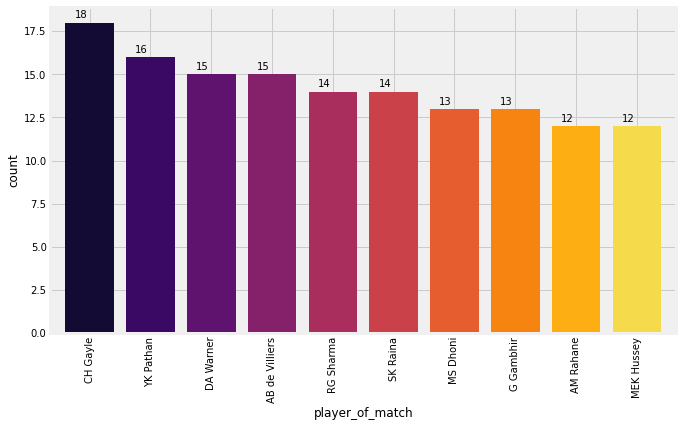

In [64]:
mlt.subplots(figsize=(10,6))
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

In [65]:
print('Winners By Years')
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)
#getting the last match in every season since the last match will be the final match for the season

Winners By Years
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']


In [66]:
print('\n Total Matches with Super Overs:',delivery[delivery['is_super_over']==1].match_id.nunique())


 Total Matches with Super Overs: 7


In [67]:
teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
play=delivery[delivery['is_super_over']==1].batting_team.unique()
play=list(play)
print('Teams who haven"t ever played a super over are:' ,list(set(teams)-set(play)))

Teams who haven"t ever played a super over are: ['PW', 'RPS', 'DC', 'KTK']


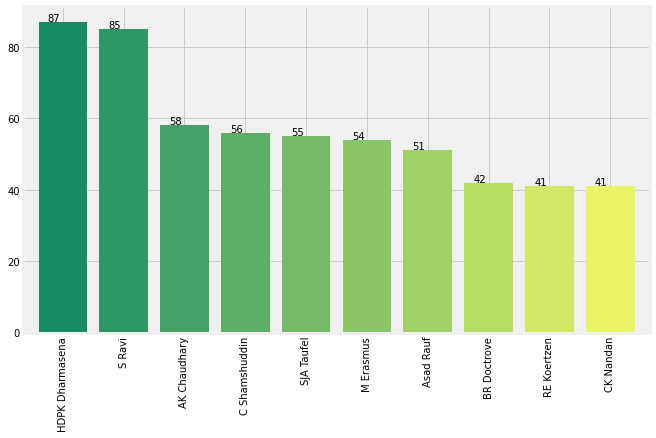

In [68]:
mlt.subplots(figsize=(10,6))
ump=pd.concat([matches['umpire1'],matches['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('summer',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

In [69]:
def comparator(team1):
    teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
    teams.remove(team1)
    opponents=teams.copy()
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)
    
comparator('MI')

        MI  KKR
winner  16    5
        MI  RCB
winner  13    8
        MI  DC
winner   6   4
        MI  CSK
winner  12   10
        MI  RR
winner  10   6
        MI  DD
winner  11   9
        MI  GL
winner   2   2
        MI  KXIP
winner  10    10
        MI  SRH
winner   5    5
        RPS  MI
winner    4   2
        KTK
winner    1
        MI  PW
winner   5   1


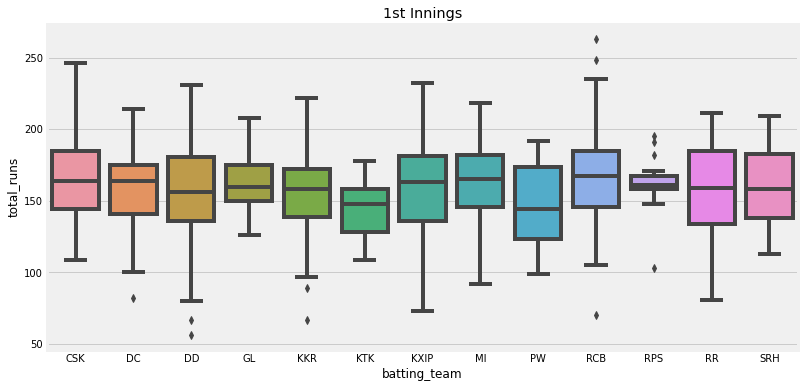

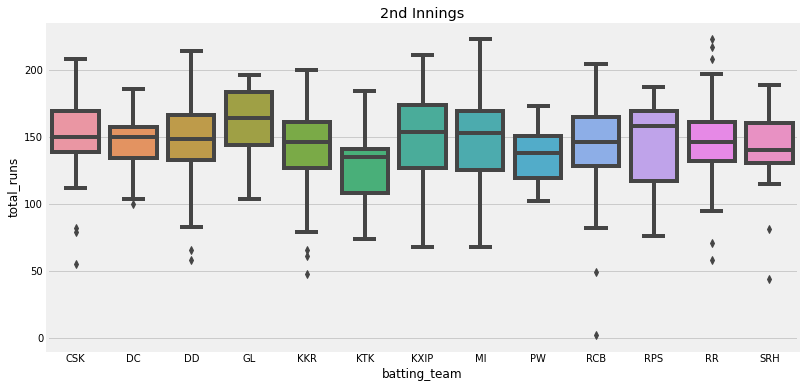

In [70]:
mlt.subplots(figsize=(12,6))
xyz=delivery.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
mlt.show()
sns.boxplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
fig=mlt.gcf()
fig.set_size_inches(12,6)

In [71]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')



,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
596,296,1,KXIP,RCB,232
522,259,1,DD,KXIP,231
981,486,1,KXIP,CSK,231
100,50,1,KXIP,MI,230
1170,580,1,RCB,SRH,227


C:\Users\mahed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\mahed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



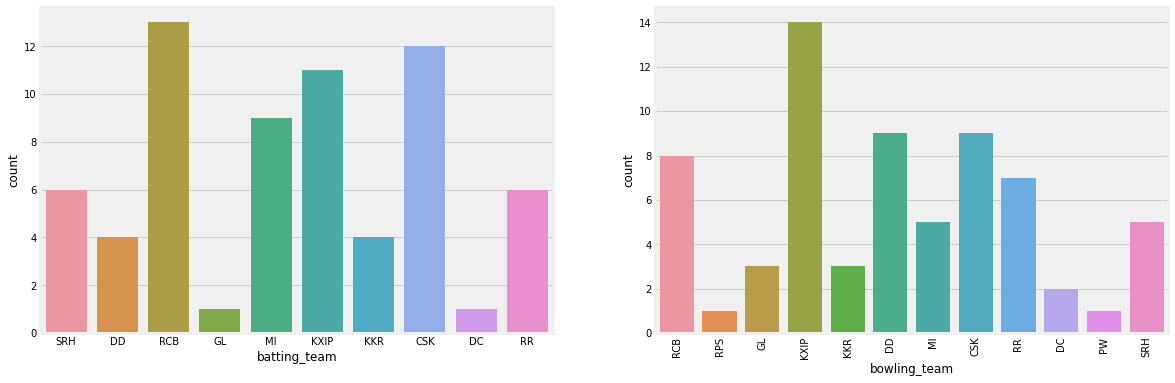

In [72]:
fig, ax =mlt.subplots(1,2)
sns.countplot(high_scores['batting_team'],ax=ax[0])
sns.countplot(high_scores['bowling_team'],ax=ax[1])
mlt.xticks(rotation=90)
fig=mlt.gcf()
fig.set_size_inches(18,6)
mlt.show()

In [73]:
print('Teams who have"nt ever scored 200 runs',list(set(teams)-set(high_scores['batting_team'])))
print('Teams who haven"t conceeded over 200 while bowling',list(set(teams)-set(high_scores['bowling_team'])))

Teams who have"nt ever scored 200 runs ['PW', 'RPS', 'KTK']
Teams who haven"t conceeded over 200 while bowling ['KTK']


In [74]:
high=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high.set_index(['match_id'],inplace=True)
high['total_runs'].max()
high.columns
high=high.rename(columns={'total_runs':'count'})
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
high


count
inning batting_team bowling_team       
1      CSK          DD                1
                    KKR               1
                    KXIP              2
                    MI                1
                    RCB               1
                    RR                1
                    SRH               2
       DC           RR                1
       DD           KXIP              1
                    MI                1
                    RPS               1
       GL           DD                1
       KKR          DC                1
                    KXIP              1
                    RCB               1
       KXIP         CSK               2
                    MI                1
                    RCB               2
                    RR                1
       MI           CSK               1
                    DD                4
                    RCB               1
                    RR                1
       RCB          CSK               1
                    DD                1
                    GL                2
                    KXIP              3
                    MI                1
                    PW                1
                    RR                1
                    SRH               1
       RR           CSK               1
                    DD                1
                    KXIP              1
       SRH          KKR               1
                    KXIP              2
                    RCB               2
                    RR                1
2      CSK          KXIP              1
                    RCB               1
                    RR                1
       DD           GL                1
       KKR          KXIP              1
       KXIP         CSK               2
                    DD                1
                    KKR               1
                    SRH               1
       MI           CSK               1
                    KXIP              1
       RCB          KXIP              1
                    SRH               1
       RR           CSK               1
                    DC                1
                    MI                1

In [75]:
high_scores=delivery.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 
                                           'yes', 'no')
high_scores1.head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
0,1,1,SRH,RCB,207,2,172,no
8,9,1,DD,RPS,205,2,108,no
19,20,1,RCB,GL,213,2,192,no
31,32,1,SRH,KXIP,207,2,181,no
35,36,1,SRH,KKR,209,2,161,no


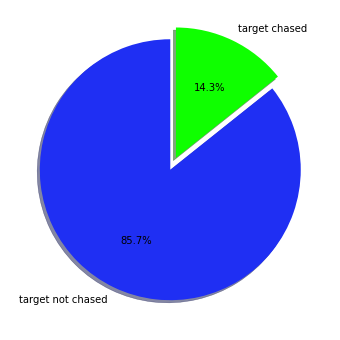

In [76]:
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
list(slices)
labels=['target not chased','target chased']
mlt.pie(slices,labels=labels,colors=['#1f2ff3', '#0fff00'],startangle=90,shadow=True,explode=(0,0.1),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

In [77]:
balls=delivery.groupby(['batsman'])['ball'].count().reset_index()
runs=delivery.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=delivery.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=delivery.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)
balls.head()

,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,16,15,DC,10
1,A Ashish Reddy,196,280,142.857143,16,15,SRH,36
2,A Chandila,7,4,57.142857,0,0,RR,4
3,A Chopra,75,53,70.666667,7,0,KKR,24
4,A Choudhary,20,25,125.000000,1,1,RCB,15


In [78]:
def batsman_comparator(stat1,stat2,batsman1,batsman2):
    sns.FacetGrid(balls,hue='Team',size=8).map(mlt.scatter, stat1,stat2, alpha=0.5).add_legend()
    bats1=balls[balls['batsman'].str.contains(batsman1)].sort_values(by=stat1,ascending=False)
    bats2=balls[balls['batsman'].str.contains(batsman2)].sort_values(by=stat1,ascending=False)
    mlt.scatter(bats1[stat1],bats1[stat2]-1,s=75,c='#55ff33')
    mlt.text(x=bats1[stat1].values[0],y=bats1[stat2].values[0],s=batsman1,
            fontsize=10, weight='bold', color='#f46d43')
    mlt.scatter(bats2[stat1],bats2[stat2],s=75,c='#f73545')
    mlt.text(x=bats2[stat1].values[0],y=bats2[stat2].values[0]+1,s=batsman2, 
            fontsize=10, weight='bold', color='#ff58fd')
    mlt.gcf().set_size_inches(15,10)
    mlt.title('Batsman Comparator',size=25)
    mlt.show()

C:\Users\mahed\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



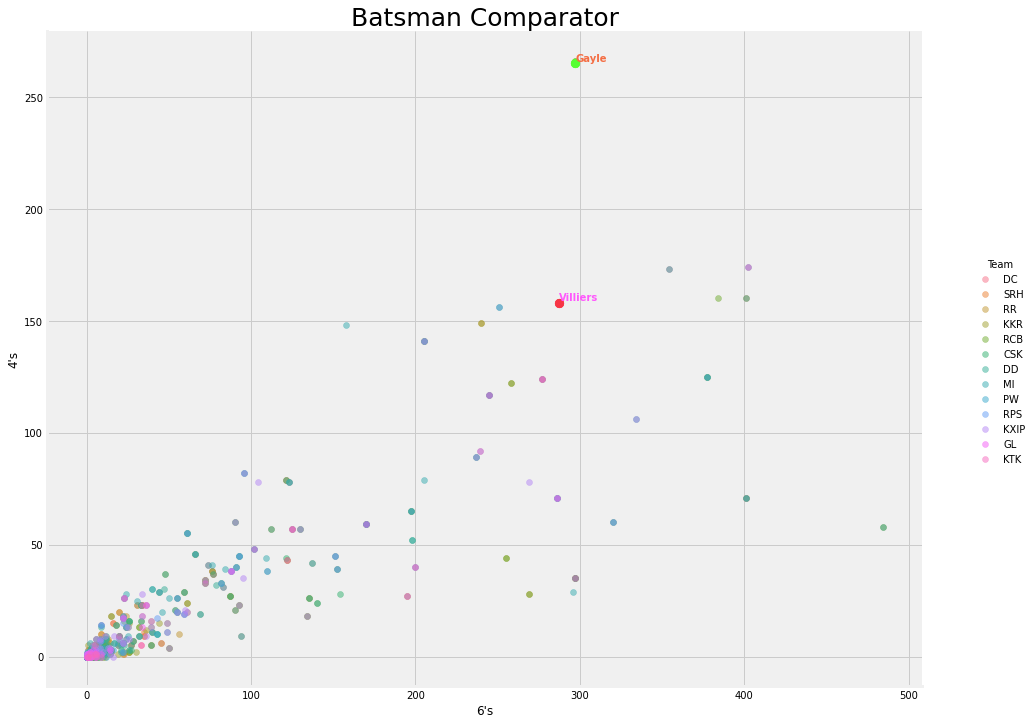

In [79]:
batsman_comparator("6's","4's",'Gayle','Villiers') #comparing gayle and de-villiers based on their respective boundaries

C:\Users\mahed\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



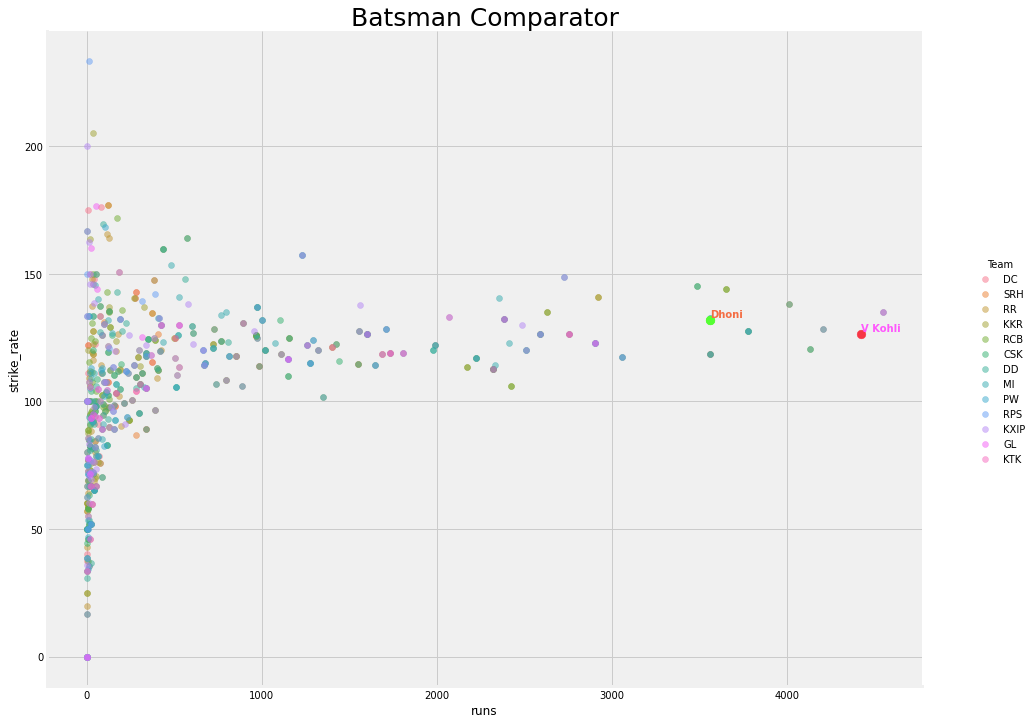

In [80]:
batsman_comparator("runs","strike_rate",'Dhoni','V Kohli')

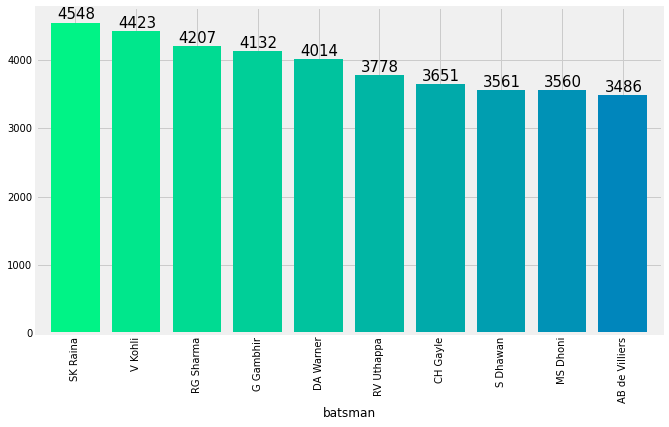

In [81]:
mlt.subplots(figsize=(10,6))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
mlt.show()

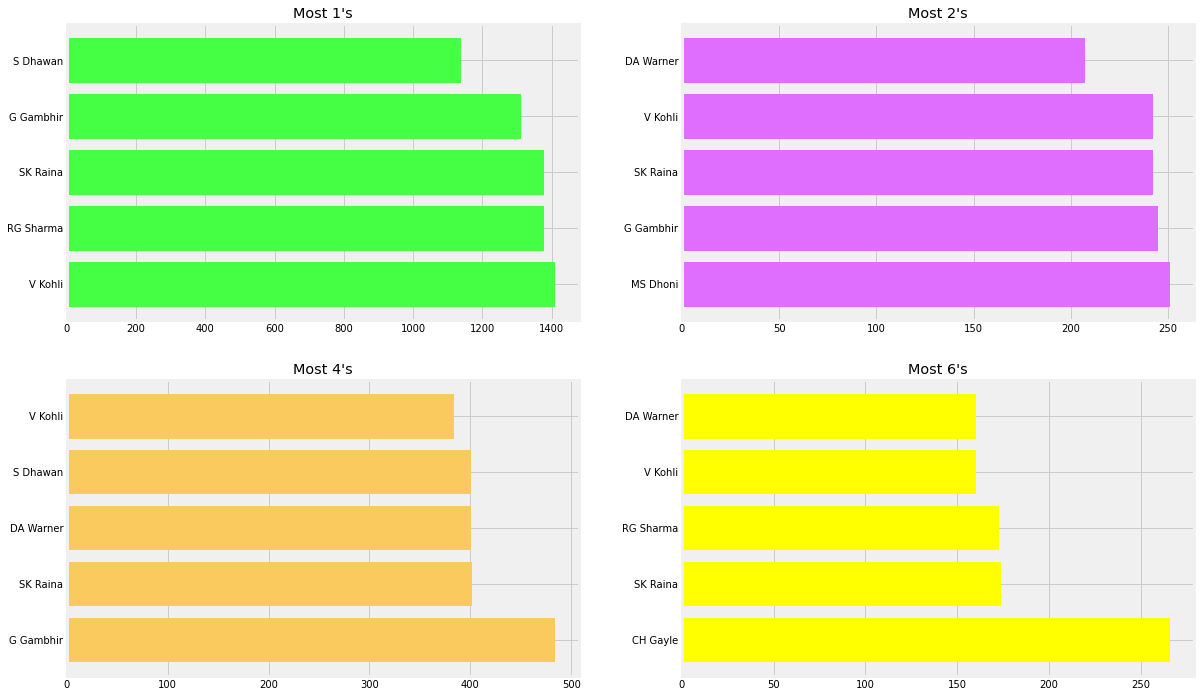

In [82]:
toppers=delivery.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=mlt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
mlt.show()

In [83]:
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


C:\Users\mahed\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mahed\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mahed\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mahed\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mahed\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\mahed\anaconda3\lib\site-packag

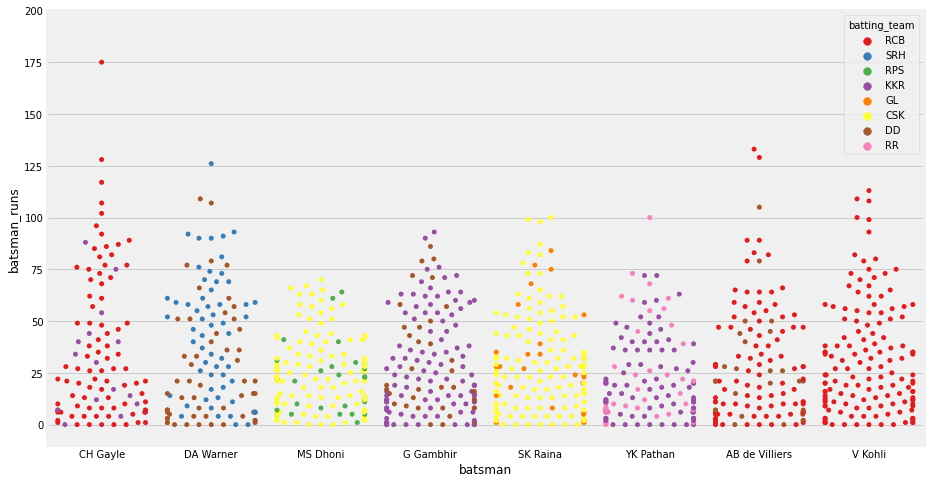

In [84]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=mlt.gcf()
fig.set_size_inches(14,8)
mlt.ylim(-10,200)
mlt.show()

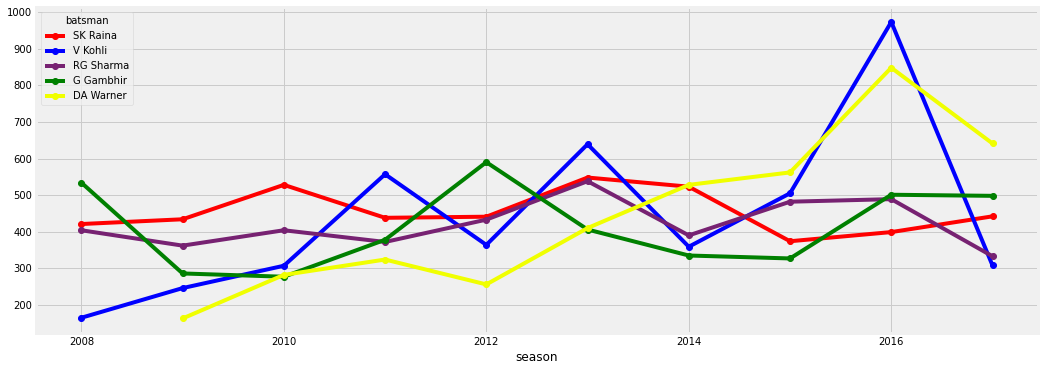

In [85]:
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=mlt.gcf()
fig.set_size_inches(16,6)
mlt.show()

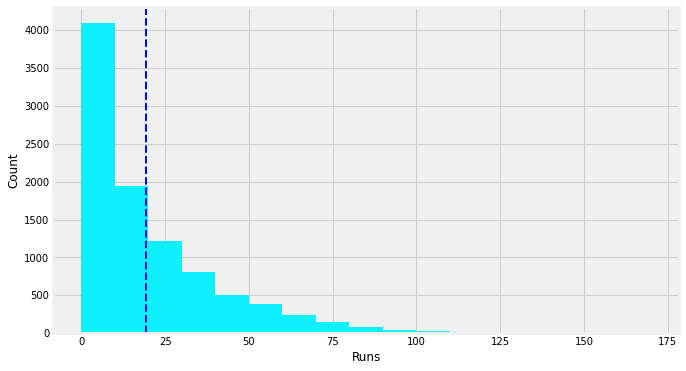

In [86]:
mlt.subplots(figsize=(10,6))
bins=range(0,180,10)
mlt.hist(top_scores["batsman_runs"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
mlt.xlabel('Runs')
mlt.ylabel('Count')
mlt.axvline(top_scores["batsman_runs"].mean(), color='b', linestyle='dashed', linewidth=2)
mlt.plot()
mlt.show()

In [89]:
orange=matches[['id','season']]
orange=orange.merge(delivery,left_on='id',right_on='match_id',how='left')
orange=orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"],keep="first")
orange.sort_values(by='season')

trace1 = go.Bar(
    x=orange['season'].values,
    y=orange['batsman_runs'].values,
    name='Total Matches',
    text=orange['batsman'].values,
    marker=dict(
        color='rgb(255,140,0)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=1
)


layout = go.Layout(
    title='Orange-Cap Holders'
)
data=[trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')